In [1403]:
#First, we import the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [1404]:
#upload dataset
df=pd.read_csv("football_data.csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [1405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [1406]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [1407]:
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

Data Cleaning

In [1408]:
#We look at the number of NULL values
df.isnull().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

In [1409]:
# Club column also has 34 NULL values
df["Club"].isnull().sum()

np.int64(34)

In [1410]:
df["Club"]

0      (BET)
1      (BAR)
2      (ATL)
3      (CAR)
4      (VAL)
       ...  
655    (UTR)
656    (AJA)
657    (PSV)
658      NaN
659    (PSV)
Name: Club, Length: 660, dtype: object

In [1411]:
# We remove NULL values
df.dropna(subset=["Club"], inplace=True)

In [1412]:
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [1413]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Netherlands,Eredivisie,(RZA),Haris Vuckic,23,2,2194,11,6.00,0.26,38,17,1.65,0.74,2020
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020


In [1414]:
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [1415]:
sorted_values = df.sort_values(by='Goals',ascending=False)
sorted_values


,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016
317,USA,MLS,(LAF),Carlos Vela,33,0,3128,36,25.35,0.77,167,75,5.07,2.28,2019
391,Italy,Serie A,(LAZ),Ciro Immobile,36,1,3371,36,26.61,0.75,142,71,4.00,2.00,2019
195,Spain,La Liga,(BAR),Lionel Messi,29,5,2849,36,25.49,0.85,170,87,5.67,2.90,2018
408,Germany,Bundesliga,(BAY),Robert Lewandowski,31,0,2783,34,31.05,1.06,138,67,4.71,2.29,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Portugal,Primeira Liga,(FAM),Carlos Valenzuela,7,1,575,2,1.03,0.17,10,3,1.65,0.50,2019
362,Portugal,Primeira Liga,(FER),Douglas Tanque,7,0,644,2,2.51,0.37,25,9,3.69,1.33,2019
345,Portugal,Primeira Liga,(BRA),Bruno Viana,8,0,780,2,1.31,0.16,7,2,0.85,0.24,2019
352,Portugal,Primeira Liga,(VGU),Andre Andre,8,0,645,2,1.70,0.25,7,2,1.03,0.29,2019


EDA - Exploratory Data Analysis


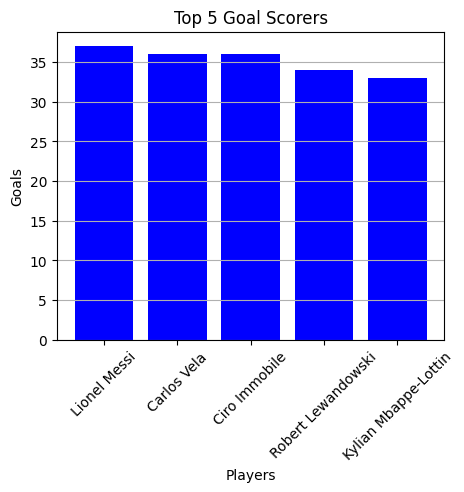

In [1416]:
top_players = df.nlargest(7, 'Goals')
# Make Graph
plt.figure(figsize=(5, 4))
plt.bar(top_players['Player Names'], top_players['Goals'], color='blue')
plt.xlabel('Players')
plt.ylabel('Goals')
plt.title('Top 5 Goal Scorers')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show graph
plt.show()

In [1417]:
name_to_find = 'Cristiano Ronaldo'
result = df.loc[df['Player Names'] == name_to_find]
result

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,25,24.68,0.89,162,60,5.84,2.16,2016
112,Spain,La Liga,(JUV),Cristiano Ronaldo,27,0,2375,26,29.00,1.16,178,76,7.12,3.04,2017
203,Italy,Serie A,(JUV),Cristiano Ronaldo,30,1,2857,21,21.65,0.72,177,68,5.89,2.26,2018
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019
553,Italy,Serie A,(JUV),Cristiano Ronaldo,5,1,397,8,5.31,1.27,26,13,6.22,3.11,2020


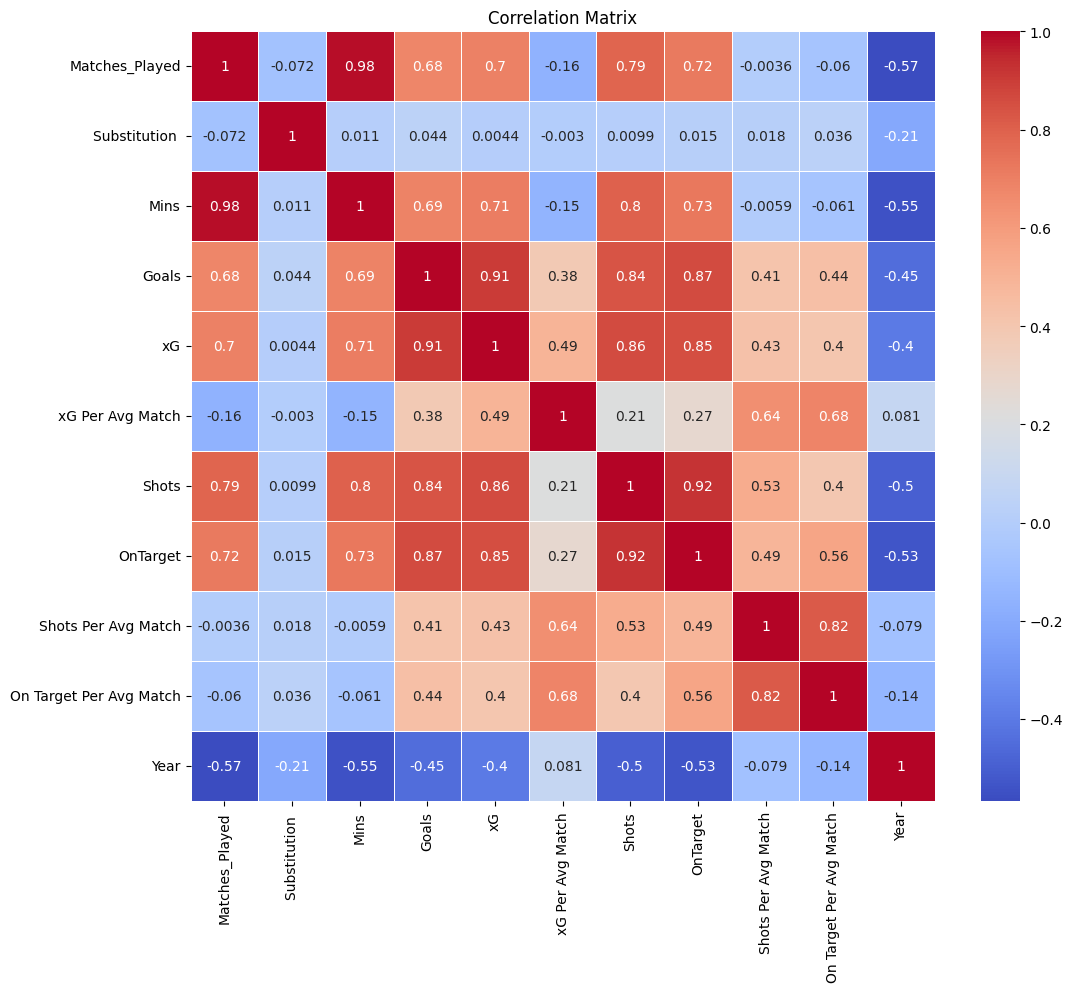

In [1418]:
# We select the numerical columns to find the correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
# We calculate the correlation matrix
correlation_matrix = numerical_df.corr()
# Show the correlation matrix graphically:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<Axes: ylabel='Mins'>

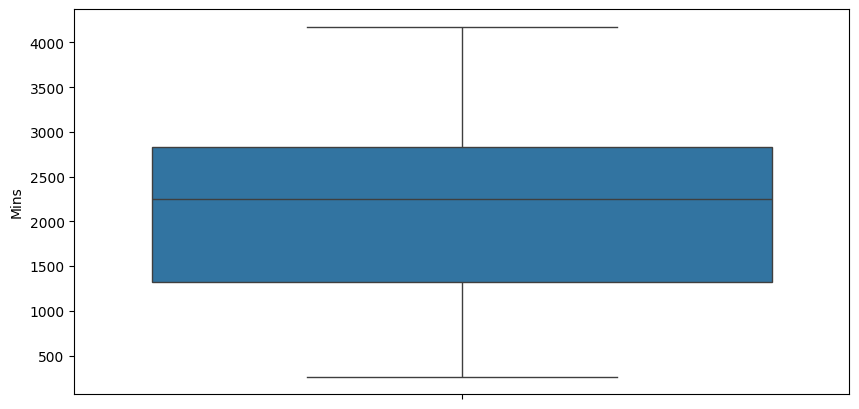

In [1419]:
# Box Plot
import seaborn as sns
sns.boxplot(numerical_df["Mins"])

In [1420]:
numerical_df['Goals']

0      11
1      16
2      28
3      13
4      13
       ..
654    11
655    10
656    12
657     7
659     7
Name: Goals, Length: 626, dtype: int64

In [1421]:
numerical_df['Goals'].max()

np.int64(37)

In [1422]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,22.330671,3.138978,2066.292332,11.798722,10.088035,0.476997,64.400958,28.420128,2.963482,1.319696,2018.407348
std,9.863756,3.792394,910.496713,6.095853,5.814411,0.195333,35.485848,16.655786,0.928117,0.481538,1.357130
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1326.250000,8.000000,6.000000,0.340000,37.000000,17.000000,2.340000,0.980000,2017.000000
50%,24.000000,2.000000,2247.500000,11.000000,9.260000,0.440000,62.000000,26.000000,2.850000,1.250000,2019.000000
75%,31.000000,5.000000,2829.750000,14.000000,13.242500,0.570000,86.000000,37.000000,3.430000,1.550000,2020.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


array([[<Axes: title={'center': 'Shots'}>,
        <Axes: title={'center': 'Matches_Played'}>],
       [<Axes: title={'center': 'OnTarget'}>,
        <Axes: title={'center': 'Goals'}>]], dtype=object)

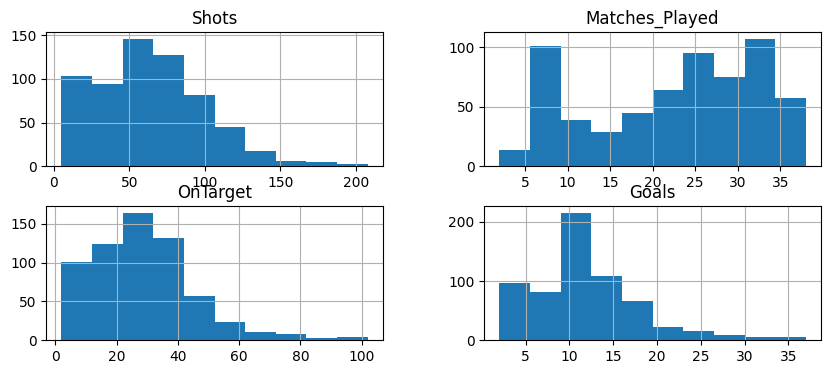

In [1423]:
features = ["Shots","Matches_Played","OnTarget", "Goals"]
df[features].hist(figsize=(10, 4))

# A football player who plays a lot of games gets a lot of shots at the goal and the shots that go to the goal turn into more goals

<Axes: ylabel='Density'>

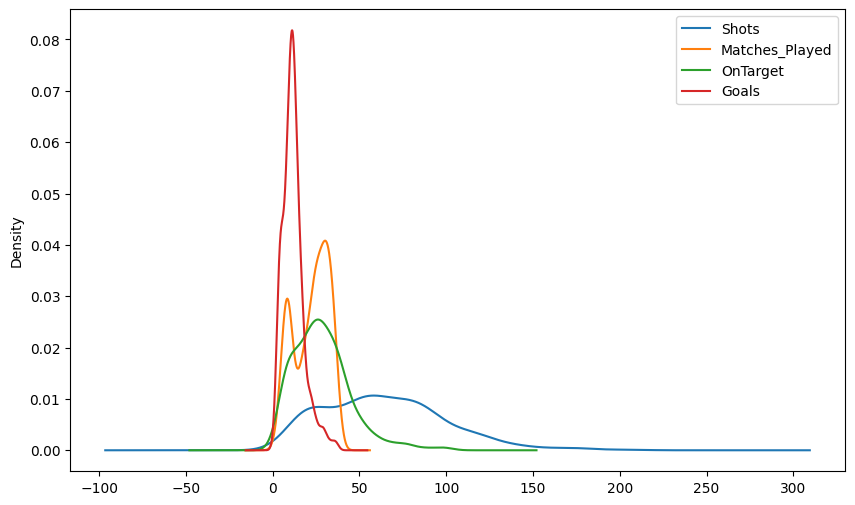

In [1424]:
df[features].plot(kind="density", figsize=(10, 6))


In [1425]:
df[features].describe()

,Shots,Matches_Played,OnTarget,Goals
count,626.000000,626.000000,626.000000,626.000000
mean,64.400958,22.330671,28.420128,11.798722
std,35.485848,9.863756,16.655786,6.095853
min,5.000000,2.000000,2.000000,2.000000
25%,37.000000,14.000000,17.000000,8.000000
50%,62.000000,24.000000,26.000000,11.000000
75%,86.000000,31.000000,37.000000,14.000000
max,208.000000,38.000000,102.000000,37.000000


In [1426]:
mean_val = df['Goals'].mean()
median_val = df['Goals'].median()
mode_val = df['Goals'].mode()

print(median_val)
print(mode_val)
print(mean_val)

11.0
0    11
Name: Goals, dtype: int64
11.798722044728434


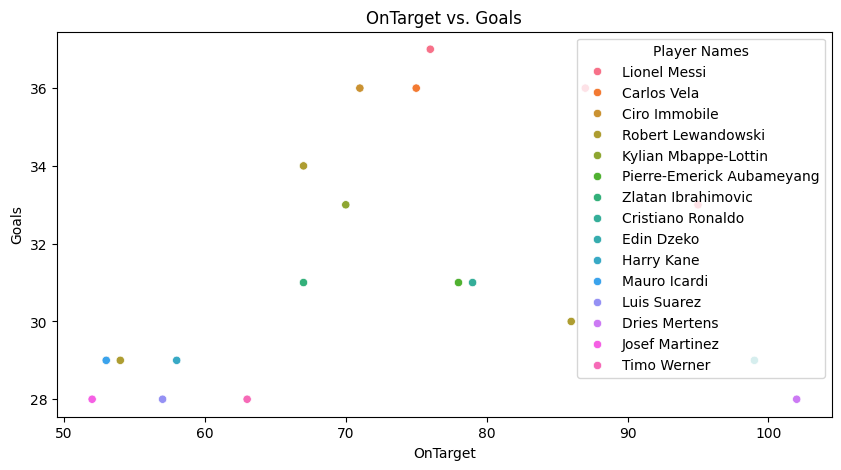

In [1427]:
#Relationship between Goals and OnTarget
top_players = df.nlargest(20, 'Goals')
sns.scatterplot(data=top_players, x='OnTarget', y='Goals', hue='Player Names')
plt.title('OnTarget vs. Goals')
plt.xlabel('OnTarget')
plt.ylabel('Goals')
plt.show()

Model Building

In [1428]:
from sklearn.preprocessing import PolynomialFeatures


# Define features and target
X = df[['Matches_Played', 'Mins', 'Shots', 'OnTarget', 'xG', 'Shots Per Avg Match', 'On Target Per Avg Match']]
y = df['Goals']
# Run the train-test section
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PolynomialFeatures object and fit it only on the train dataset
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)
# Apply transform to x_test
X_test_poly = poly.transform(X_test)
# Get the predictions
y_pred = linear_model.predict(X_test_poly)



1. Mean Squared Error (MSE)
Definition: Measures the average of the squares of errors (the average squared difference between predicted and actual values).
Purpose: Indicates model accuracy; lower values mean better performance. It is sensitive to outliers.
2. Root Mean Squared Error (RMSE)
Definition: The square root of MSE; provides an error metric in the same units as the original data.
Purpose: Easier to interpret; lower RMSE indicates closer predictions to actual values.
3. R² Score (Coefficient of Determination)
Definition: Represents the proportion of variance in the dependent variable predictable from the independent variables.
Purpose: Ranges from 0 to 1; higher values indicate a better fit of the model to the data. A value of 1 means perfect prediction.


Summary
These metrics are essential for objectively evaluating and comparing regression model performance. Lower MSE and RMSE, along with higher R² Score, indicate better models.

In [1429]:
# We calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R² Score
mse_pl = mean_squared_error(y_test, y_pred)
rmse_pl = mean_squared_error(y_test, y_pred, squared=False)
r2_pl = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_pl}")
print(f"Root Mean Squared Error (RMSE): {rmse_pl}")
print(f"R² Score: {r2_pl}")

Mean Squared Error (MSE): 6.296946916656136
Root Mean Squared Error (RMSE): 2.509371817139926
R² Score: 0.8179113160744003


C:\Users\adilr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1430]:
first_5_players = df.nlargest(5, 'Goals')

# We transform each player's features into PolynomialFeatures
first_5_players_features = first_5_players[['Matches_Played', 'Mins', 'Shots', 'OnTarget', 'xG', 'Shots Per Avg Match', 'On Target Per Avg Match']]
first_5_players_poly = poly.transform(first_5_players_features)

# Prediction of future goals:
future_goals = linear_model.predict(first_5_players_poly)

# Resulta
prediction_df = pd.DataFrame({
    'Player Name': first_5_players['Player Names'],
    'Status Current goals': first_5_players['Goals'],
    'Expected Future Goals': future_goals
})

print("\nFuture goals of the top 5 top scorers:")
print(prediction_df)


Future goals of the top 5 top scorers:
            Player Name  Status Current goals  Expected Future Goals
12         Lionel Messi                    37              32.813145
195        Lionel Messi                    36              31.745600
317         Carlos Vela                    36              30.115718
391       Ciro Immobile                    36              30.541036
408  Robert Lewandowski                    34              33.788790


We are building our second XGBOOST model

In [1431]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [1432]:
# Defining features and target
X = df[['Matches_Played', 'Mins', 'Shots', 'OnTarget', 'xG', 'Shots Per Avg Match', 'On Target Per Avg Match']]
y = df['Goals']

In [1433]:
# Build the XGBoost model
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror', 
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=100
)
# Train the model
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [1434]:
# Get the predictions
y_pred = xg_reg.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False)
r2_xgb = r2_score(y_test, y_pred)

C:\Users\adilr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1435]:
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

Mean Squared Error (MSE): 7.883141618381458
Root Mean Squared Error (RMSE): 2.8076932913659673
R² Score: 0.7720432877540588


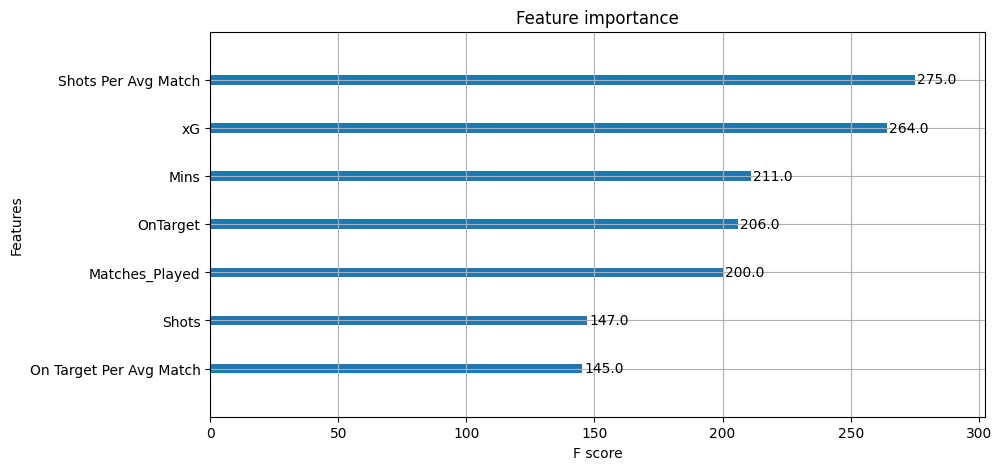

In [1436]:
#Specify feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


In [1437]:
# Select the top 5 players with the most goals
first_5_players = df.sort_values(by='Goals', ascending=False).head(5)
# Select the features (according to your model)
X_first_5_players = first_5_players[['Matches_Played', 'Mins', 'Shots', 'OnTarget', 'xG', 'Shots Per Avg Match', 'On Target Per Avg Match']]


In [1438]:
# Get predictions from the model
y_pred_first_5 = xg_reg.predict(X_first_5_players)


In [1439]:
# Add the prediction results to a DataFrame
prediction_df = pd.DataFrame({
    'Player Names': first_5_players['Player Names'],
    'Current goals': first_5_players['Goals'],
    'Expected Future Goals': y_pred_first_5
})

# Results
print(prediction_df)


           Player Names  Current goals  Expected Future Goals
12         Lionel Messi             37              35.111519
317         Carlos Vela             36              34.753891
391       Ciro Immobile             36              30.759163
195        Lionel Messi             36              33.528900
408  Robert Lewandowski             34              32.674191


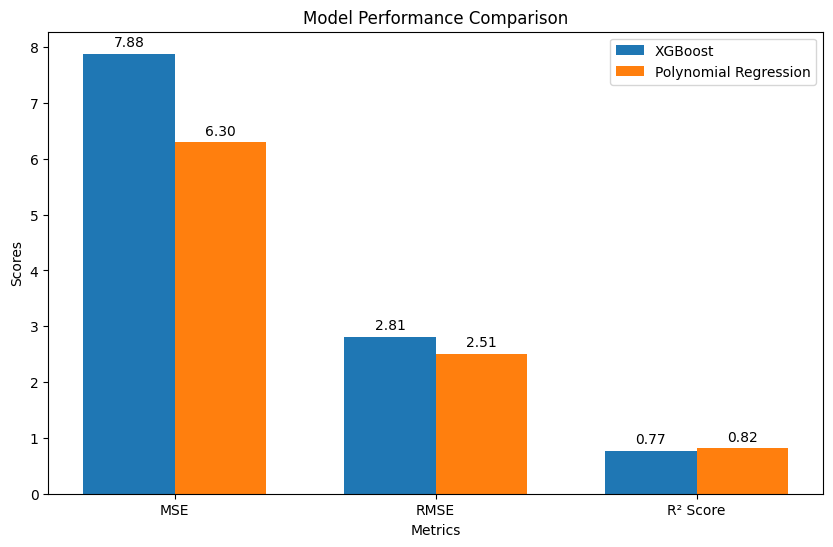

In [1440]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the calculated metrics from the previous code
# Replace these values with the actual metrics calculated
metrics = ['MSE', 'RMSE', 'R² Score']
xgb_scores = [mse_xgb, rmse_xgb, r2_xgb]
rf_scores = [mse_pl, rmse_pl, r2_pl]

# Set up the positions and width for the bars
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
bars_xgb = ax.bar(x - width/2, xgb_scores, width, label='XGBoost')
bars_pl = ax.bar(x + width/2, rf_scores, width, label='Polynomial Regression')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
# Display scores on each bar
for bars in [bars_xgb, bars_pl]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Display value
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text position
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

